In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC


In [2]:

df = pd.read_csv("D:/Na/ReGeneL/gene_diff_data.csv")
sid =list(df["SID"])
deg_genes_ID = df["SID"]
gse = pd.read_csv("D:/Na/ReGeneL/GSE66099.csv")
list1= ["SID"] + sid + ["Died"]
deg_genes = gse[list1]
deg_genes = deg_genes.iloc[: , 1:]
deg_genes

,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,Died
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split

# y = degs_gene_data.iloc[:,108].values
X, y = deg_genes.iloc[:,0:108].values, deg_genes.iloc[:,108].values

In [4]:
# normalize data:
def nml(gene_data):
    normalize_data = (gene_data - min(gene_data))/(max(gene_data) - min(gene_data))
    return normalize_data

for i in range(108):
    X[:,i] = nml(X[:,i])
X

array([[0.57697486, 0.34433825, 0.61513556, ..., 0.40091366, 0.20974908,
        0.17101969],
       [0.56674423, 0.03274116, 0.72320089, ..., 0.46379284, 0.12501523,
        0.38131577],
       [0.86814946, 0.08490889, 0.69300869, ..., 0.24478979, 0.25499418,
        0.25409926],
       ...,
       [0.34651585, 0.81422575, 0.40625859, ..., 0.26286847, 0.08681668,
        0.17778783],
       [0.21307966, 0.12687091, 0.37075729, ..., 0.31621004, 0.26356147,
        0.33536072],
       [0.20540484, 0.07980607, 0.35282589, ..., 0.15933786, 0.21767935,
        0.20460477]])

In [8]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234,
                                                   shuffle=True, stratify=y)

In [9]:
X_train

array([[0.39323916, 0.04336657, 0.75039359, ..., 0.53926584, 0.60008803,
        0.9498727 ],
       [0.32662678, 0.07818974, 0.44010662, ..., 0.05821086, 0.02814846,
        0.17580829],
       [0.29135019, 0.38247523, 0.19543662, ..., 0.15551006, 0.27218526,
        0.29302603],
       ...,
       [0.53644919, 0.07959396, 0.32406712, ..., 0.30420208, 0.26034917,
        0.21680219],
       [0.27129233, 0.18338037, 0.85566323, ..., 0.26847214, 0.24705957,
        0.18191082],
       [0.30884024, 0.29450522, 0.29601126, ..., 0.07798669, 0.05316753,
        0.13897664]])

In [16]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#random_state = 0 
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
sco = rf.score(X_test, y_test)
print(sco)

0.9166666666666666


Feature: 0, Score: 0.01092
Feature: 1, Score: 0.01087
Feature: 2, Score: 0.02731
Feature: 3, Score: 0.01902
Feature: 4, Score: 0.00643
Feature: 5, Score: 0.01904
Feature: 6, Score: 0.00978
Feature: 7, Score: 0.02070
Feature: 8, Score: 0.00451
Feature: 9, Score: 0.02037
Feature: 10, Score: 0.00215
Feature: 11, Score: 0.00284
Feature: 12, Score: 0.00247
Feature: 13, Score: 0.04654
Feature: 14, Score: 0.00755
Feature: 15, Score: 0.00932
Feature: 16, Score: 0.00216
Feature: 17, Score: 0.00783
Feature: 18, Score: 0.00081
Feature: 19, Score: 0.00242
Feature: 20, Score: 0.00295
Feature: 21, Score: 0.00966
Feature: 22, Score: 0.00247
Feature: 23, Score: 0.00418
Feature: 24, Score: 0.01287
Feature: 25, Score: 0.00168
Feature: 26, Score: 0.00379
Feature: 27, Score: 0.00729
Feature: 28, Score: 0.00997
Feature: 29, Score: 0.00618
Feature: 30, Score: 0.00729
Feature: 31, Score: 0.00250
Feature: 32, Score: 0.00661
Feature: 33, Score: 0.02423
Feature: 34, Score: 0.00985
Feature: 35, Score: 0.00365
Fe

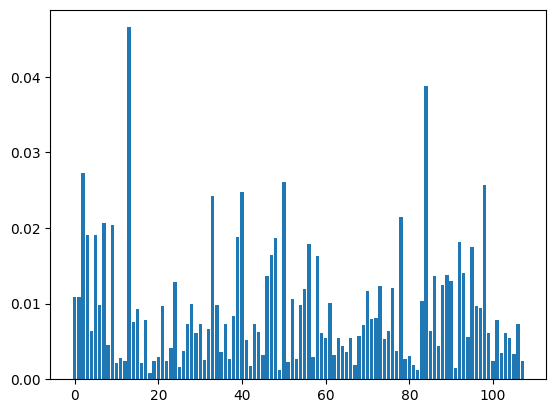

In [35]:
from matplotlib import pyplot
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
score = pd.DataFrame(importance)
score

,0
0,0.010923
1,0.010875
2,0.027314
3,0.019024
4,0.006433
...,...
103,0.006153
104,0.005461
105,0.003391
106,0.007263


In [37]:
gene_score = pd.DataFrame(deg_genes_ID)
gene_score["score"] = score
gene_score

,SID,score
0,SLC39A8,0.010923
1,RHAG,0.010875
2,DDIT4,0.027314
3,MPO,0.019024
4,RRM2,0.006433
...,...,...
103,KIF2C,0.006153
104,POLE2,0.005461
105,UBE2C,0.003391
106,AURKB,0.007263


In [38]:
gene_score.to_csv("D:/Na/ReGeneL/gene_score_rf.csv")

In [39]:
gene = []
for i in deg_genes_ID:
    gene.append(i)
gene_rank = []
gene_score_ind = []
for i in range(108):
    max_ind = np.argmax(importance)
    gene_rank.append(gene[max_ind])
    gene_score_ind.append(max_ind)
    importance[max_ind] = 0

In [40]:
a = gene_score_ind
total_comb = [None]*108
for i in range(108):
    arr = []
    for j in range(0, i + 1):
        arr.append(a[j])
    total_comb[i] = arr
    

In [41]:
for val in total_comb:
    print(val)

[13]
[13, 84]
[13, 84, 2]
[13, 84, 2, 50]
[13, 84, 2, 50, 98]
[13, 84, 2, 50, 98, 40]
[13, 84, 2, 50, 98, 40, 33]
[13, 84, 2, 50, 98, 40, 33, 78]
[13, 84, 2, 50, 98, 40, 33, 78, 7]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95, 47]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95, 47, 58]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95, 47, 58, 93]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95, 47, 58, 93, 89]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9, 5, 3, 39, 48, 92, 56, 95, 47, 58, 93, 89, 86]
[13, 84, 2, 50, 98, 40, 33, 78, 7, 9

In [42]:
#Gene_validation
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
# in and out files
markers_file = './results/sepsis/fs_scores.csv'

out_file = './results/sepsis/fs_scores.csv'
is_save_results = True

# data pre-processing
is_normalize_samples = False
is_normalize_columns = True
norm_filter = MinMaxScaler()

# experiment
num_folds = 5

label = 'Died'
# Set random seed
seed = 8
np.random.seed(seed)

In [43]:
def evaluate2(y_pred, y_test, y_probs):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    return  np.array([acc, sn, sp, mcc, auc])

In [44]:
#5 fold CV 
from sklearn.model_selection import StratifiedKFold, KFold
from scipy import interp
from sklearn.metrics import *
def do_cross_validation_for_sing_model(X_comb, new_y, model, num_folds=5, random_state = 0, n_runs = 5):
   
    res = np.zeros(shape=(num_folds * n_runs, 5)) # 5 is the number of metrics #5 or 4?
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
        for train_index, test_index in skf.split(X_comb, new_y):
            X_train2, X_test2 = X_comb[train_index], X_comb[test_index]
            y_train2, y_test2 = new_y[train_index], new_y[test_index]
            
            train_filtered = X_train2
            test_filtered = X_test2

            model.fit(train_filtered, y_train2)
            Y_probs = model.predict_proba(test_filtered)[:, 1]
            Y_pred = model.predict(test_filtered)

            res[count, :] = evaluate2(Y_pred, y_test2, Y_probs)
            count += 1
            
    return res

In [45]:
import math
def std_mean_cal(res):
    means = [None]*5
    stds = [None]*5
    for i in range(5):
        mean = round(np.mean(res[:,i]),2)
        means[i] = mean
        std = sum(np.square(res[:,i] - means[i]))/25
        stds[i] = round(np.std(res[:,i]),2)
    M = [means, stds]
    return M

In [59]:
# classifiers
models = {
  'SVM-RBF':SVC(kernel='rbf',probability=True),
  'RF': RandomForestClassifier(n_estimators=100,  random_state=seed),
  'LR': SGDClassifier(loss="log", penalty="l2", random_state=seed),
  'KNN': KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=-1),
  'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=seed), n_estimators=10, random_state=seed),  
  'Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)
}
print('Performance reported using:\t ACC\tSn\tSp\tMCC\tAUC')

model_name = ['SVM-RBF', 'RF', 'LR', 'KNN', 'Bagging', 'Boosting']


count = 0
total = []
#     print(models[model])
for comb in total_comb:
    X_comb = pd.DataFrame((X_train)[:,comb])
    num_runs = 5
    res = do_cross_validation_for_sing_model(X_comb.values, y_train, model = models['Boosting'], num_folds=5, n_runs=5)
    result = std_mean_cal(res)
    count += 1
    mean_std = {
        "Comb": comb,
        "ACC": str((result[0])[0]) + "+-" + str((result[1])[0]),
        "Sn": str((result[0])[1]) + "+-" + str((result[1])[1]),
        "Sp": str((result[0])[2]) + "+-" + str((result[1])[2]),
        "Mcc": str((result[0])[3]) + "+-" + str((result[1])[3]),
        "AUC": str((result[0])[4]) + "+-" + str((result[1])[4])
    }
    total.append(mean_std)
    print(res)
    print(count)
    print('---------------------------------------------------------------')


Performance reported using:	 ACC	Sn	Sp	MCC	AUC
[[ 0.84375     0.25        0.92857143  0.20261022  0.75446429]
 [ 0.875       0.75        0.89285714  0.54470478  0.9375    ]
 [ 0.84375     0.2         0.96296296  0.24444444  0.58148148]
 [ 0.8125      0.2         0.92592593  0.15686368  0.66296296]
 [ 0.80645161  0.          0.92592593 -0.10107974  0.64814815]
 [ 0.84375     0.25        0.92857143  0.20261022  0.6875    ]
 [ 0.8125      0.          0.92857143 -0.09759001  0.66071429]
 [ 0.71875     0.          0.85185185 -0.16265001  0.58518519]
 [ 0.75        0.2         0.85185185  0.05185185  0.59259259]
 [ 0.87096774  0.5         0.92592593  0.42592593  0.76388889]
 [ 0.84375     0.          0.96428571 -0.06788442  0.58482143]
 [ 0.84375     0.25        0.92857143  0.20261022  0.79910714]
 [ 0.75        0.2         0.85185185  0.05185185  0.44814815]
 [ 0.84375     0.4         0.92592593  0.35783003  0.7       ]
 [ 0.77419355  0.          0.88888889 -0.12598816  0.47685185]
 [ 0.781

In [61]:
#export
(pd.DataFrame(total)).to_csv("D:/Na/ReGeneL/Boosting - result_rf.csv")